In [1]:
import pickle
import polars as pl
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("dark_background")

# dfs = pickle.load(open(f"join0.2leave0.4.p", "rb"))

# nr_frames = pl.max(dfs['frame'])
# nr_reds = np.zeros(nr_frames)
# nr_blues = np.zeros(nr_frames)
# nr_total_individuals = pl.max(dfs['id'])+1

# for frame in range(max(dfs["frame"])):
#     indiv = dfs[["id","x","y","image_index"]][dfs["frame"]==frame].to_numpy()
#     for i,ind in enumerate(indiv):
#         if ind[-1] == 1:
#             nr_reds[frame] += 1
#         elif ind[-1] == 2:
#             nr_blues[frame] += 1

# nr_neutral = np.asarray([nr_total_individuals]*nr_frames-nr_reds-nr_blues)/50
# nr_reds = nr_reds/50
# nr_blues = nr_blues/50

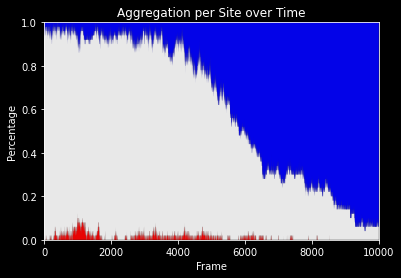

In [36]:
# plt.style.use("dark_background")

# fig, ax = plt.subplots()

# fig = plt.stackplot(range(nr_frames),
#               [nr_reds,nr_neutral,nr_blues],
#               labels=['reds', 'neutral', 'blue'],
#               colors=['red','white','blue'],
#               alpha=.9)

# ax.set_xlim([0,10000])
# ax.set_ylim([0,1])

# ax.set_title("Aggregation per Site over Time")
# # ax.set_ylabel("Percentahe of birds in a flock")
# ax.set_xlabel("Frame")
# ax.set_ylabel('Percentage')
# # plt.legend(['0.0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9'])

# ax.set_facecolor("#202020")

In [5]:
def get_blue_white_red_proportions(index):
    dfs = pickle.load(open(f"J0.9L0.3_{index}.p", "rb"))
    nr_frames = pl.max(dfs['frame'])
    nr_reds = np.zeros(nr_frames)
    nr_blues = np.zeros(nr_frames)
    nr_total_individuals = pl.max(dfs['id'])+1

    for frame in range(max(dfs["frame"])):
        indiv = dfs[["id","x","y","image_index"]][dfs["frame"]==frame].to_numpy()
        for i,ind in enumerate(indiv):
            if ind[-1] == 1:
                nr_reds[frame] += 1
            elif ind[-1] == 2:
                nr_blues[frame] += 1

    nr_neutral = np.asarray([nr_total_individuals]*nr_frames-nr_reds-nr_blues)/50
    nr_reds = nr_reds/50
    nr_blues = nr_blues/50

    return nr_reds, nr_neutral, nr_blues, nr_frames

In [8]:
nr_reds, nr_neutral, nr_blues, nr_frames = get_blue_white_red_proportions(0)

In [27]:
sum_red = int(sum((nr_reds[9000:]*50).round()))
sum_blue = int(sum((nr_blues[9000:]*50).round()))
sum_blue/(sum_red+sum_blue)

0.9994456880929539

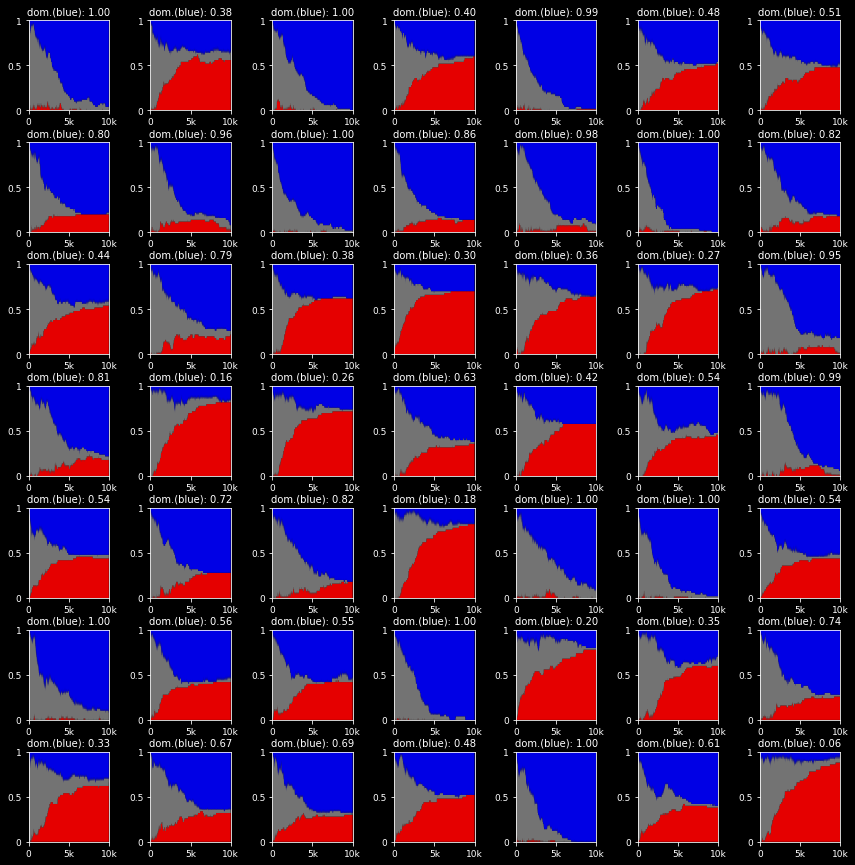

In [43]:
doms = []
length = 7
height = 7
fig_dfo, axs = plt.subplots(height,length,figsize=(12,12))
fig_dfo.tight_layout()
for j in range(length):
      for i in range(height):
            nr_reds, nr_neutral, nr_blues, nr_frames = get_blue_white_red_proportions(j*length+i)
            axs[i,j].stackplot(range(nr_frames),
                  [nr_reds,nr_neutral,nr_blues],
                  colors=['red','grey','blue'],
                  alpha=.9)
            
            sum_red = int(sum((nr_reds[9000:]*50).round()))
            sum_blue = int(sum((nr_blues[9000:]*50).round()))
            domination_blue = sum_blue/(sum_red+sum_blue)

            doms.append(domination_blue)

            axs[i,j].set_title(f'dom.(blue): {domination_blue:.2f}',fontsize=10)
            axs[i,j].set_xlim([0,10000])
            axs[i,j].set_ylim([0,1])
            axs[i,j].set_xticks([0,5000,10000])
            axs[i,j].set_xticklabels(['0','5k','10k'],fontdict={'fontsize': 9})
            axs[i,j].set_yticks([0,0.5,1])
            axs[i,j].set_yticklabels(['0','0.5','1'],fontdict={'fontsize': 9})

In [45]:
print(f'blue dominated in {(np.asarray(doms) > 0.5).sum()} out of {len(doms)} cases.')


blue dominated in 32 out of 49 cases.


In [6]:
fig_dfo.savefig('case2exp2.png',transparent=True,dpi=300)